In [28]:
#!pip install keras
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np # linear algebra
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import math   
from datetime import datetime, date 

import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
import datetime as dt

print("Setup Complete")

Setup Complete


In [29]:
#모델불러오기
dam = pd.read_csv('./data/다목적댐 데이터/보령댐_시간별.csv', encoding= 'cp949', thousands=',')
dam.head()

,일시,댐수위(ELm),강우량(mm),유입량(㎡/sec),총방류량(㎡/sec),저수량(백만㎥/sec),저수율(%)
0,2015-01-01 01시,66.12,0.0,2.6,2.6,53.0,45.3
1,2015-01-01 02시,66.12,0.0,3.0,3.0,53.0,45.3
2,2015-01-01 03시,66.12,0.0,3.1,3.1,53.0,45.3
3,2015-01-01 04시,66.12,0.0,3.0,3.0,53.0,45.3
4,2015-01-01 05시,66.12,0.0,2.9,2.9,53.0,45.3


In [30]:
dam.columns = ['date', 'water_level', 'rainfall', 'inflow', 'outflow', 'storage', 'storage_rate']
dam.head()

,date,water_level,rainfall,inflow,outflow,storage,storage_rate
0,2015-01-01 01시,66.12,0.0,2.6,2.6,53.0,45.3
1,2015-01-01 02시,66.12,0.0,3.0,3.0,53.0,45.3
2,2015-01-01 03시,66.12,0.0,3.1,3.1,53.0,45.3
3,2015-01-01 04시,66.12,0.0,3.0,3.0,53.0,45.3
4,2015-01-01 05시,66.12,0.0,2.9,2.9,53.0,45.3


In [31]:
#결측값 확인
print(dam.isnull().sum())

date            0
water_level     0
rainfall        8
inflow          0
outflow         0
storage         0
storage_rate    0
dtype: int64


In [32]:
dam=dam.interpolate()

In [33]:
#결측값 제거
#dam = dam.dropna(axis=0)

In [34]:
print(dam.isnull().sum())

date            0
water_level     0
rainfall        0
inflow          0
outflow         0
storage         0
storage_rate    0
dtype: int64


In [35]:
dam.describe()

,water_level,rainfall,inflow,outflow,storage,storage_rate
count,74937.000000,74937.000000,74937.000000,74937.000000,74937.000000,74937.000000
mean,63.834850,0.156070,4.809672,3.879728,44.492453,38.064314
std,4.467609,1.159574,19.230348,12.237647,17.338853,14.832148
min,52.160000,0.000000,0.000000,0.000000,9.690000,8.300000
25%,61.080000,0.000000,2.000000,2.700000,32.850000,28.100000
50%,63.130000,0.000000,2.800000,3.100000,40.300000,34.500000
75%,65.910000,0.000000,3.300000,3.400000,51.890000,44.400000
max,74.510000,59.400000,1208.200000,648.800000,91.060000,77.900000


In [36]:
#숫자로 변환 (필요할 경우 사용)
dam['inflow'] = pd.to_numeric(dam['inflow'],errors='coerce')

In [37]:
dam.describe()

,water_level,rainfall,inflow,outflow,storage,storage_rate
count,74937.000000,74937.000000,74937.000000,74937.000000,74937.000000,74937.000000
mean,63.834850,0.156070,4.809672,3.879728,44.492453,38.064314
std,4.467609,1.159574,19.230348,12.237647,17.338853,14.832148
min,52.160000,0.000000,0.000000,0.000000,9.690000,8.300000
25%,61.080000,0.000000,2.000000,2.700000,32.850000,28.100000
50%,63.130000,0.000000,2.800000,3.100000,40.300000,34.500000
75%,65.910000,0.000000,3.300000,3.400000,51.890000,44.400000
max,74.510000,59.400000,1208.200000,648.800000,91.060000,77.900000


In [38]:
# #사용할 데이터 범위 설정 (데이터의 범위가 잘못 되었을 경우 사용. 예를 들어 방류량이 음수이거나 수위가 0인 경우)

# dam=dam[dam['water_level']>100]
# dam=dam[dam['rainfall']>=0]
# dam=dam[dam['inflow']>=0]
# dam=dam[dam['outflow']>=0]

In [39]:
dam = dam.reset_index(drop=True)

# 변수간의 관계 분석

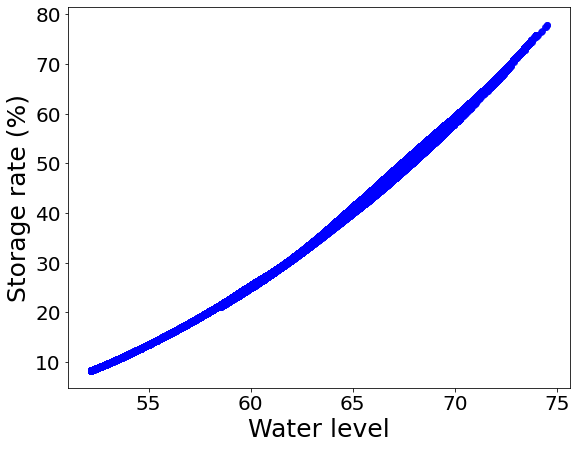

In [40]:
plt.figure(figsize=(9,7))
y= dam['storage_rate']
x= dam['water_level']
plt.plot(x,y, 'bo', alpha = 0.8)
plt.xlabel('Water level', fontsize = 25)
plt.ylabel('Storage rate (%)', fontsize = 25)
plt.xlim
plt.ylim
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.show()

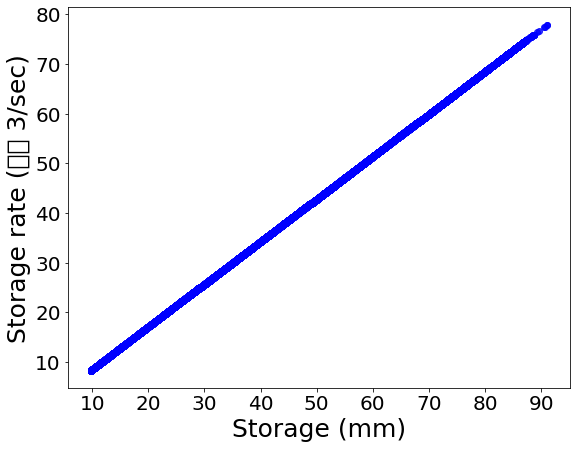

In [41]:
plt.figure(figsize=(9,7))
y= dam['storage_rate']
x= dam['storage']
plt.plot(x,y, 'bo', alpha = 0.8)
plt.xlabel('Storage (mm)', fontsize = 25)
plt.ylabel('Storage rate (백만 3/sec)', fontsize = 25)
plt.xlim
plt.ylim
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.show()

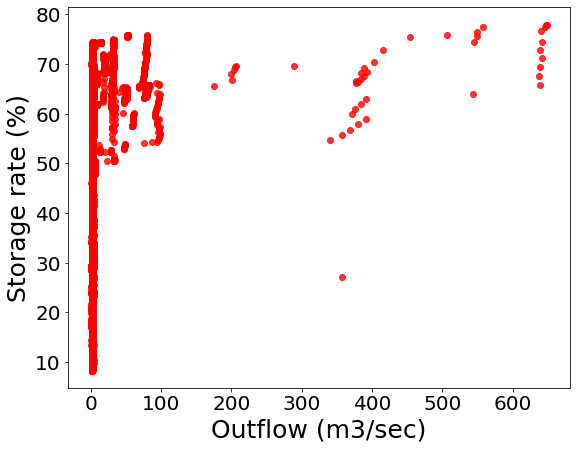

In [42]:
plt.figure(figsize=(9,7))
y= dam['storage_rate']
x= dam['outflow']
plt.plot(x,y, 'ro', alpha = 0.8)
plt.xlabel('Outflow (m3/sec)', fontsize = 25)
plt.ylabel('Storage rate (%)', fontsize = 25)
plt.xlim
plt.ylim
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.show()

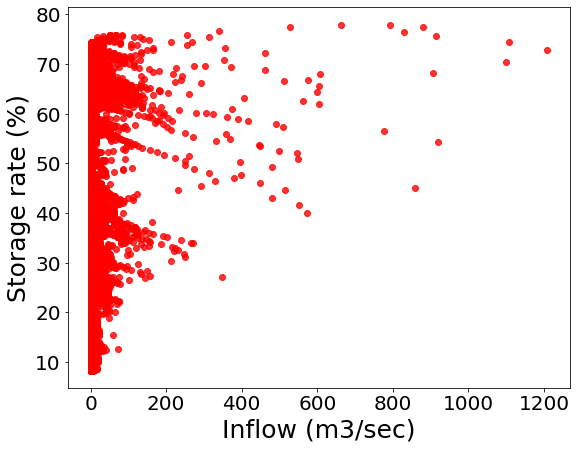

In [43]:
plt.figure(figsize=(9,7))
y= dam['storage_rate']
x= dam['inflow']
plt.plot(x,y, 'ro', alpha = 0.8)
plt.xlabel('Inflow (m3/sec)', fontsize = 25)
plt.ylabel('Storage rate (%)', fontsize = 25)
plt.xlim
plt.ylim
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.show()

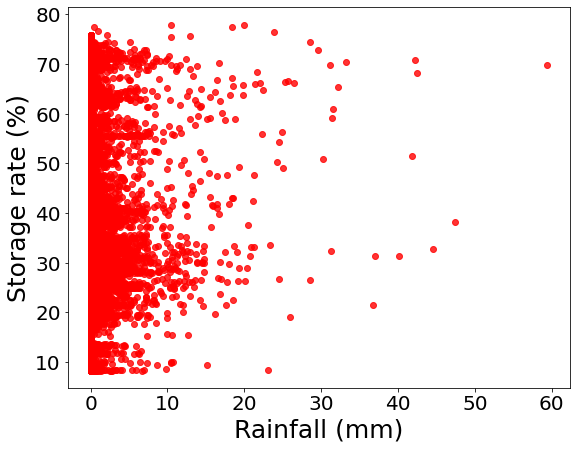

In [44]:
plt.figure(figsize=(9,7))
y= dam['storage_rate']
x= dam['rainfall']
plt.plot(x,y, 'ro', alpha = 0.8)
plt.xlabel('Rainfall (mm)', fontsize = 25)
plt.ylabel('Storage rate (%)', fontsize = 25)
plt.xlim
plt.ylim
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.show()

In [45]:
#correlation 확인
print(np.corrcoef(dam['inflow'],dam['storage_rate']))
print(np.corrcoef(dam['rainfall'],dam['storage_rate']))
print(np.corrcoef(dam['outflow'],dam['storage_rate']))

[[1.         0.10556089]
 [0.10556089 1.        ]]
[[1.         0.01531548]
 [0.01531548 1.        ]]
[[1.         0.14441123]
 [0.14441123 1.        ]]


# Remove Outlier

극한값이 예측 성능을 현저히 저하시킬 때, 필요한 경우 극한값을 제거함

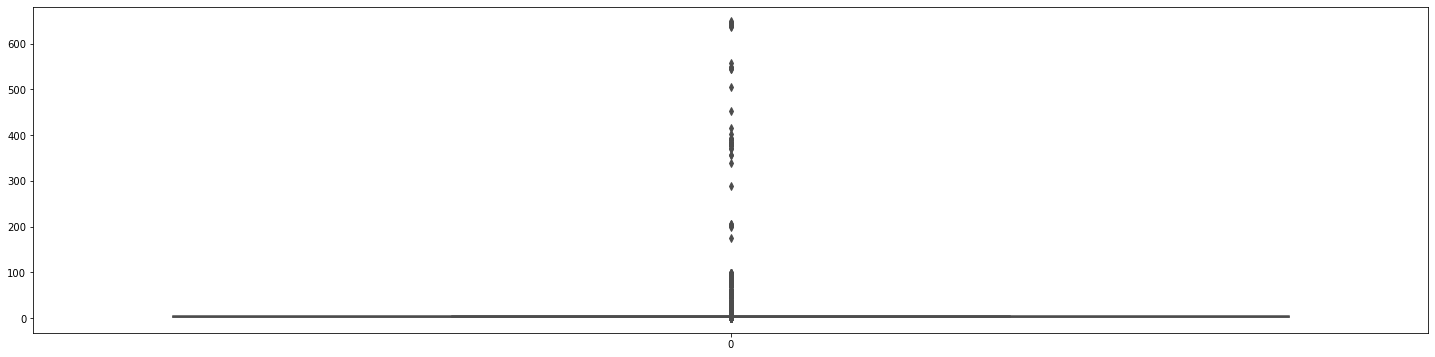

In [46]:
plt.figure(figsize=(25,6))
sns.boxplot(data=dam['outflow'], color='red')
plt.show()

In [47]:
#remove outlier

Q1 = dam['outflow'].quantile(0.25)
Q3 = dam['outflow'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (dam['outflow'] >= Q1 - 1.5 * IQR) & (dam['outflow'] <= Q3 + 1.5 *IQR)
dam = dam.loc[filter]
print(dam['outflow'].describe())
print('\n')
print(dam['outflow'].describe())

count    73071.000000
mean         3.053845
std          0.520811
min          1.700000
25%          2.700000
50%          3.100000
75%          3.400000
max          4.400000
Name: outflow, dtype: float64


count    73071.000000
mean         3.053845
std          0.520811
min          1.700000
25%          2.700000
50%          3.100000
75%          3.400000
max          4.400000
Name: outflow, dtype: float64


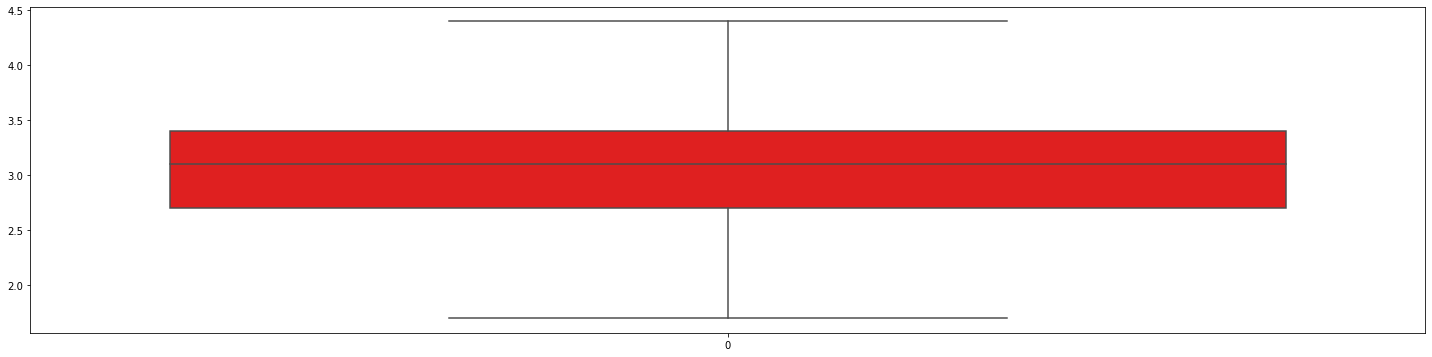

In [48]:
plt.figure(figsize=(25,6))
sns.boxplot(data=dam['outflow'], color='red')
plt.show()

In [49]:
dam = dam.reset_index(drop=True)

# 시간(날짜) 데이터 처리

In [52]:
# ~시 -> ~:00으로 바꿔야 함, 24:00 -> 다음날 00:00으로 바꿔야 함
dam['date'] = dam['date'].str.replace('시', ':00')
data = dam['date']
print(data)

0        2015-01-01 01:00 
1        2015-01-01 02:00 
2        2015-01-01 03:00 
3        2015-01-01 04:00 
4        2015-01-01 05:00 
               ...        
73066    2023-07-17 03:00 
73067    2023-07-17 04:00 
73068    2023-07-17 05:00 
73069    2023-07-17 06:00 
73070    2023-07-17 07:00 
Name: date, Length: 73071, dtype: object


In [53]:
def convert(value):
    return str(value)

str_data = data.apply(convert)

changed_index = []
new_date = [] # 가공해서 넣을 date column list 

# 시간 값이 24인 경우를 00:00:00으로 변경, 날짜 하루 더해줌. 
for date in str_data:
    if " 24:" in date:
        temp = date.replace(" 24:", " 00:")
        new_date.append(pd.to_datetime(temp)+dt.timedelta(days=1))
    else: new_date.append(pd.to_datetime(date))

print(new_date[23]) # 2015-01-02 00:00:00
dam["date"] = new_date
dam.head()

2015-01-02 00:00:00


,date,water_level,rainfall,inflow,outflow,storage,storage_rate
0,2015-01-01 01:00:00,66.12,0.0,2.6,2.6,53.0,45.3
1,2015-01-01 02:00:00,66.12,0.0,3.0,3.0,53.0,45.3
2,2015-01-01 03:00:00,66.12,0.0,3.1,3.1,53.0,45.3
3,2015-01-01 04:00:00,66.12,0.0,3.0,3.0,53.0,45.3
4,2015-01-01 05:00:00,66.12,0.0,2.9,2.9,53.0,45.3


In [54]:
dam["date"] = pd.to_datetime(dam["date"])
dam.index = dam["date"]

In [55]:
dam.head()

,date,water_level,rainfall,inflow,outflow,storage,storage_rate
date,,,,,,,
2015-01-01 01:00:00,2015-01-01 01:00:00,66.12,0.0,2.6,2.6,53.0,45.3
2015-01-01 02:00:00,2015-01-01 02:00:00,66.12,0.0,3.0,3.0,53.0,45.3
2015-01-01 03:00:00,2015-01-01 03:00:00,66.12,0.0,3.1,3.1,53.0,45.3
2015-01-01 04:00:00,2015-01-01 04:00:00,66.12,0.0,3.0,3.0,53.0,45.3
2015-01-01 05:00:00,2015-01-01 05:00:00,66.12,0.0,2.9,2.9,53.0,45.3


# 데이터 시각화

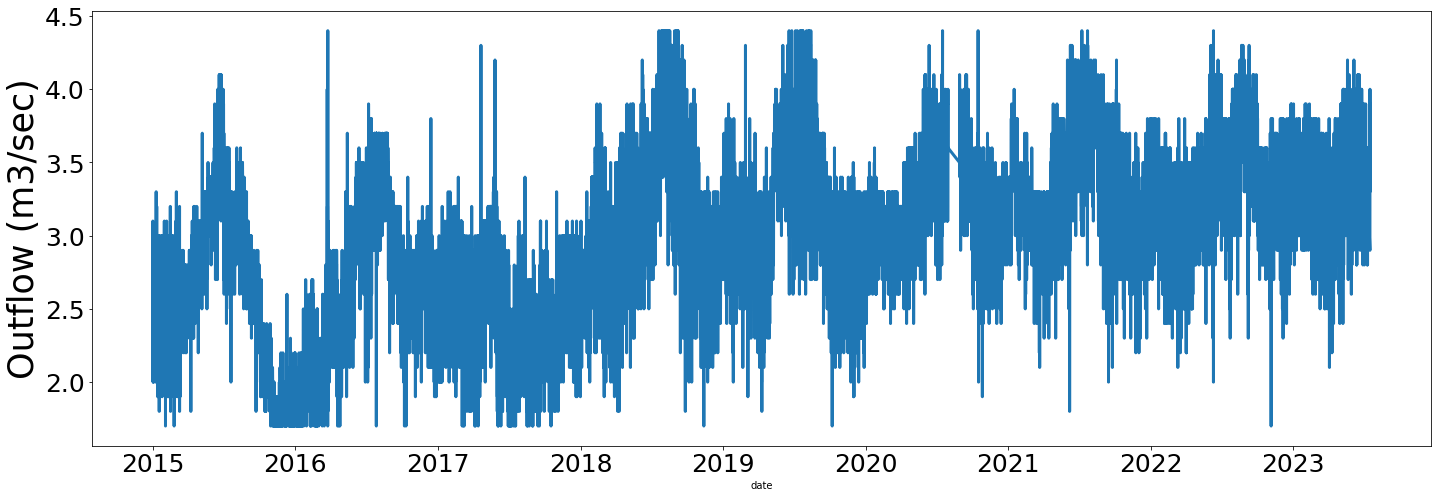

In [56]:
plt.figure(figsize=(24,8))

dam_o = sns.lineplot(data=dam['outflow'], linewidth=3)
plt.ylabel('Outflow (m3/sec)',fontsize =35)
plt.xticks(fontsize =25)
plt.yticks(fontsize =25)
#plt.grid(True)  
dam_o.xaxis.set_major_locator(mdates.YearLocator())
dam_o.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

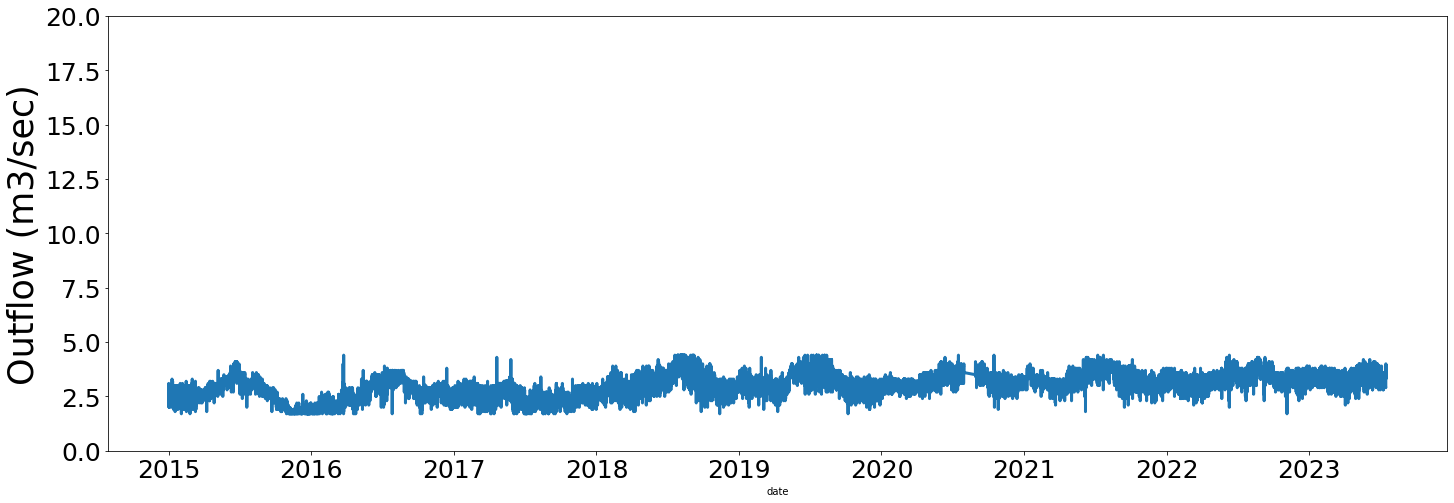

In [57]:
plt.figure(figsize=(24,8))

dam_o = sns.lineplot(data=dam['outflow'], linewidth=3)
plt.ylabel('Outflow (m3/sec)',fontsize =35)
plt.xticks(fontsize =25)
plt.yticks(fontsize =25)
plt.ylim(0,20)
#plt.grid(True)  
dam_o.xaxis.set_major_locator(mdates.YearLocator())
dam_o.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

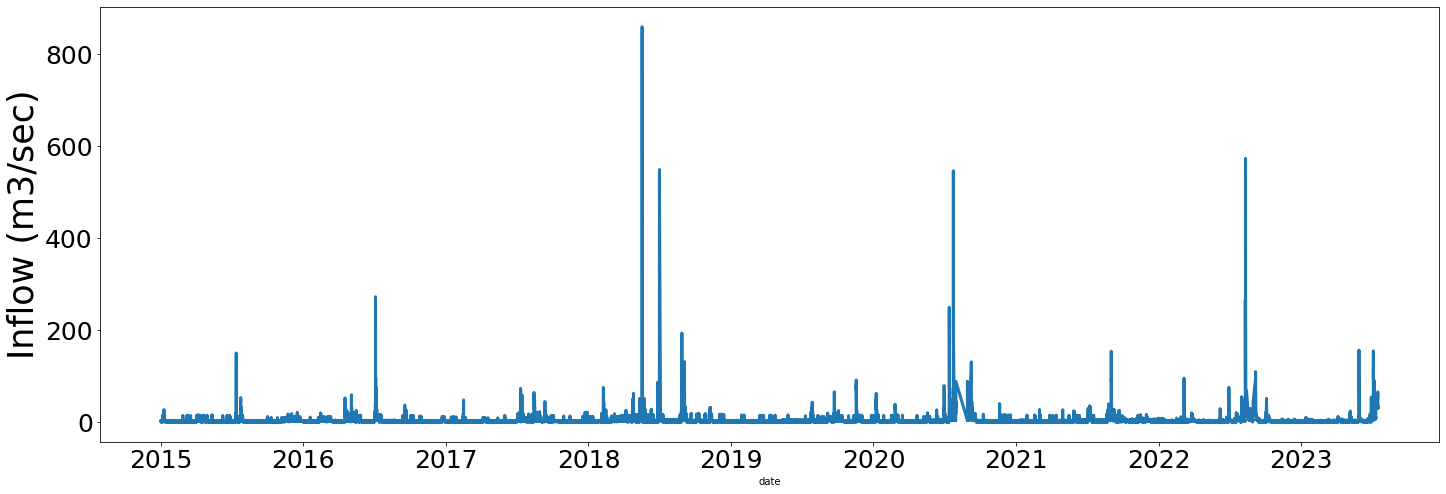

In [58]:
plt.figure(figsize=(24,8))

dam_o = sns.lineplot(data=dam['inflow'], linewidth=3)
plt.ylabel('Inflow (m3/sec)',fontsize =35)
plt.xticks(fontsize =25)
plt.yticks(fontsize =25)
#plt.grid(True)  
dam_o.xaxis.set_major_locator(mdates.YearLocator())
dam_o.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

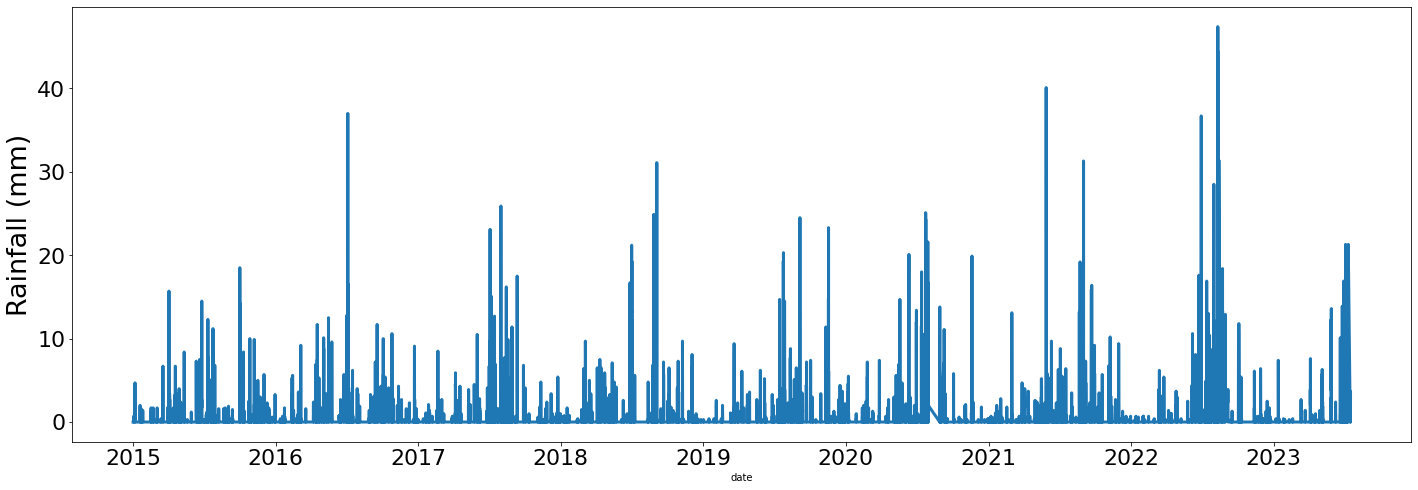

In [59]:
plt.figure(figsize=(24,8))

dam_o = sns.lineplot(data=dam['rainfall'], linewidth=3)
plt.ylabel('Rainfall (mm)',fontsize =27)
plt.xticks(fontsize =22)
plt.yticks(fontsize =22)
#plt.grid(True)  
dam_o.xaxis.set_major_locator(mdates.YearLocator())
dam_o.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

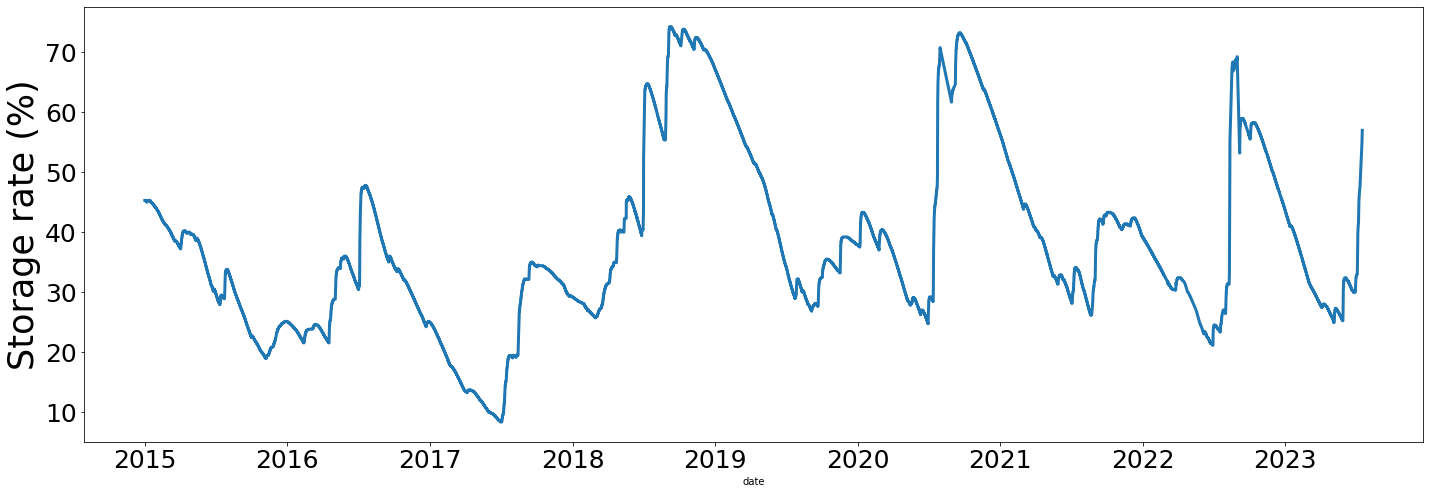

In [60]:
plt.figure(figsize=(24,8))

dam_o = sns.lineplot(data=dam['storage_rate'], linewidth=3)
plt.ylabel('Storage rate (%)',fontsize =35)
plt.xticks(fontsize =25)
plt.yticks(fontsize =25)
#plt.grid(True)  
dam_o.xaxis.set_major_locator(mdates.YearLocator())
dam_o.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

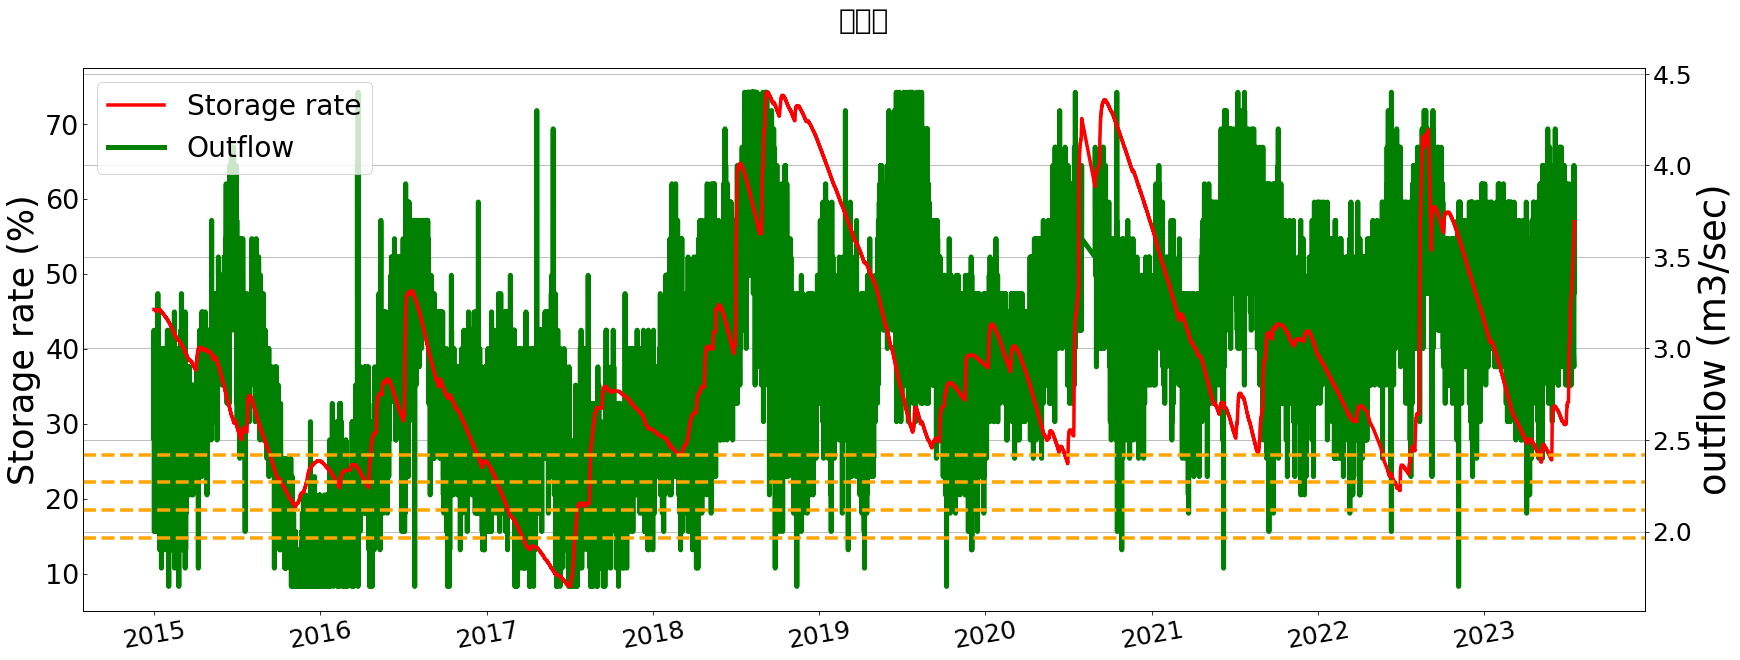

In [61]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (28,10)
#plt.rcParams['font.size'] = 18

fig, ax1 = plt.subplots()
ax1.plot(dam['storage_rate'], label='Storage rate', color='r', linewidth=3.5)
ax1.axhline(y=25.9, color='orange', linestyle='--', linewidth=3.5)  # 70% 선
ax1.axhline(y=22.2, color='orange', linestyle='--', linewidth=3.5)  # 60% 선
ax1.axhline(y=18.5, color='orange', linestyle='--', linewidth=3.5)  # 50% 선
ax1.axhline(y=14.8, color='orange', linestyle='--', linewidth=3.5)  # 40% 선

ax1.set_ylabel('Storage rate (%)', fontsize=35)
ax1.tick_params(axis='y', direction='in', labelsize=27)
ax1.tick_params(axis='x', rotation=10, labelsize=25)

ax2 = ax1.twinx()
ax2.plot(dam['outflow'], label='Outflow', color='g', linewidth=5)
ax2.set_ylabel('outflow (m3/sec)', fontsize=37)
ax2.tick_params(axis='y', labelsize=25)

ax1.set_title('보령댐\n', fontsize=28)
plt.xticks(fontsize=23)
plt.yticks(fontsize=25)
plt.grid(True)

# 범례 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=28)

ax1.set_zorder(ax1.get_zorder() + 10)
ax1.patch.set_visible(False)

plt.show()

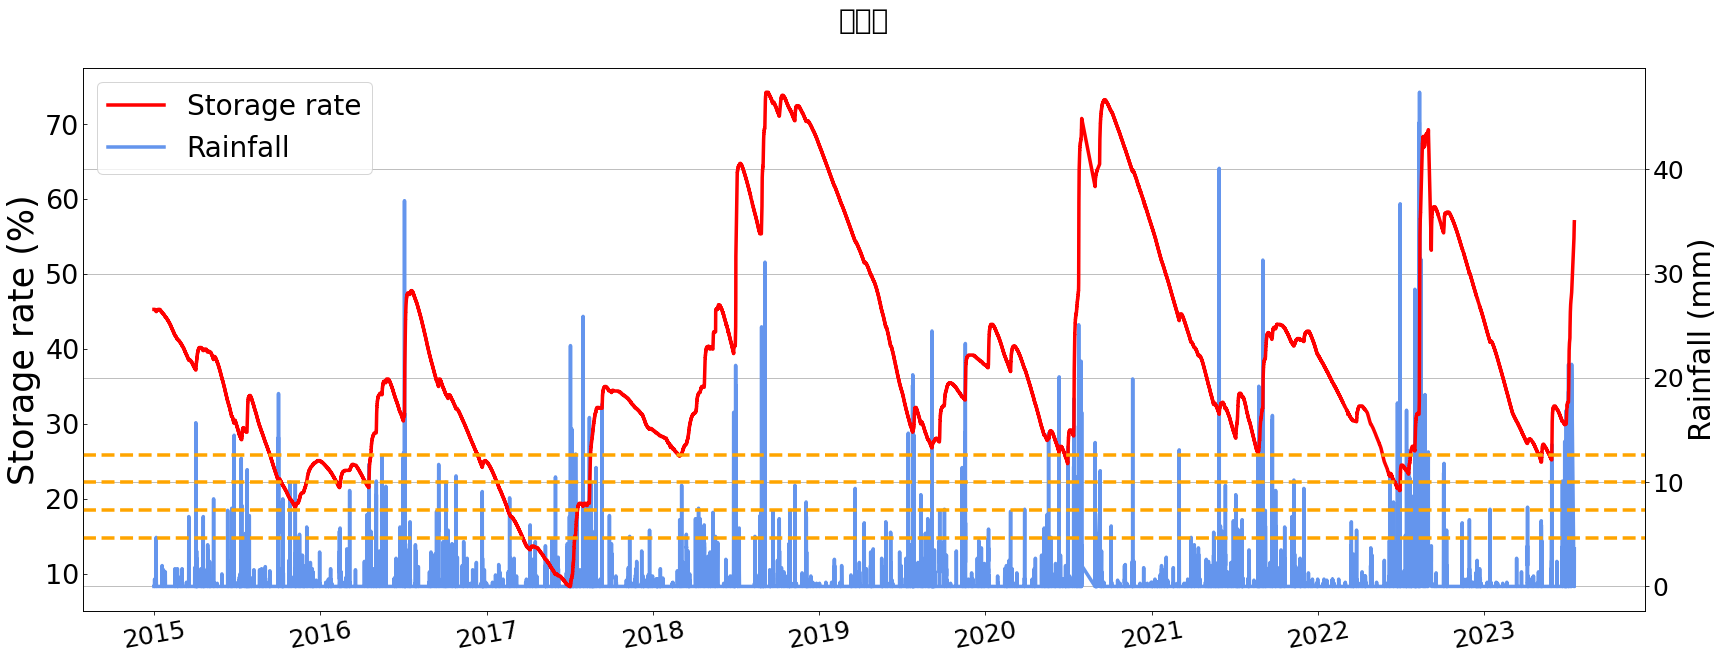

In [62]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (28, 10)
#plt.rcParams['font.size'] = 18

fig, ax1 = plt.subplots()
ax1.plot(dam['storage_rate'], label='Storage rate', color='r', linewidth=3.5)
ax1.axhline(y=25.9, color='orange', linestyle='--', linewidth=3.5)  # 70% 선
ax1.axhline(y=22.2, color='orange', linestyle='--', linewidth=3.5)  # 60% 선
ax1.axhline(y=18.5, color='orange', linestyle='--', linewidth=3.5)  # 50% 선
ax1.axhline(y=14.8, color='orange', linestyle='--', linewidth=3.5)  # 40% 선

ax1.set_ylabel('Storage rate (%)', fontsize=35)
ax1.tick_params(axis='y', direction='in', labelsize=27)
ax1.tick_params(axis='x', rotation=10, labelsize=25)

ax2 = ax1.twinx()
ax2.plot(dam['rainfall'], label='Rainfall', color='cornflowerblue', linewidth=3.5)
ax2.set_ylabel('Rainfall (mm)', fontsize=30)
ax2.tick_params(axis='y', labelsize=27)

ax1.set_title('보령댐\n', fontsize=28)
plt.xticks(fontsize=23)
plt.yticks(fontsize=25)
plt.grid(True)

# 범례 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=28)

ax1.set_zorder(ax1.get_zorder() + 10)
ax1.patch.set_visible(False)

plt.show()

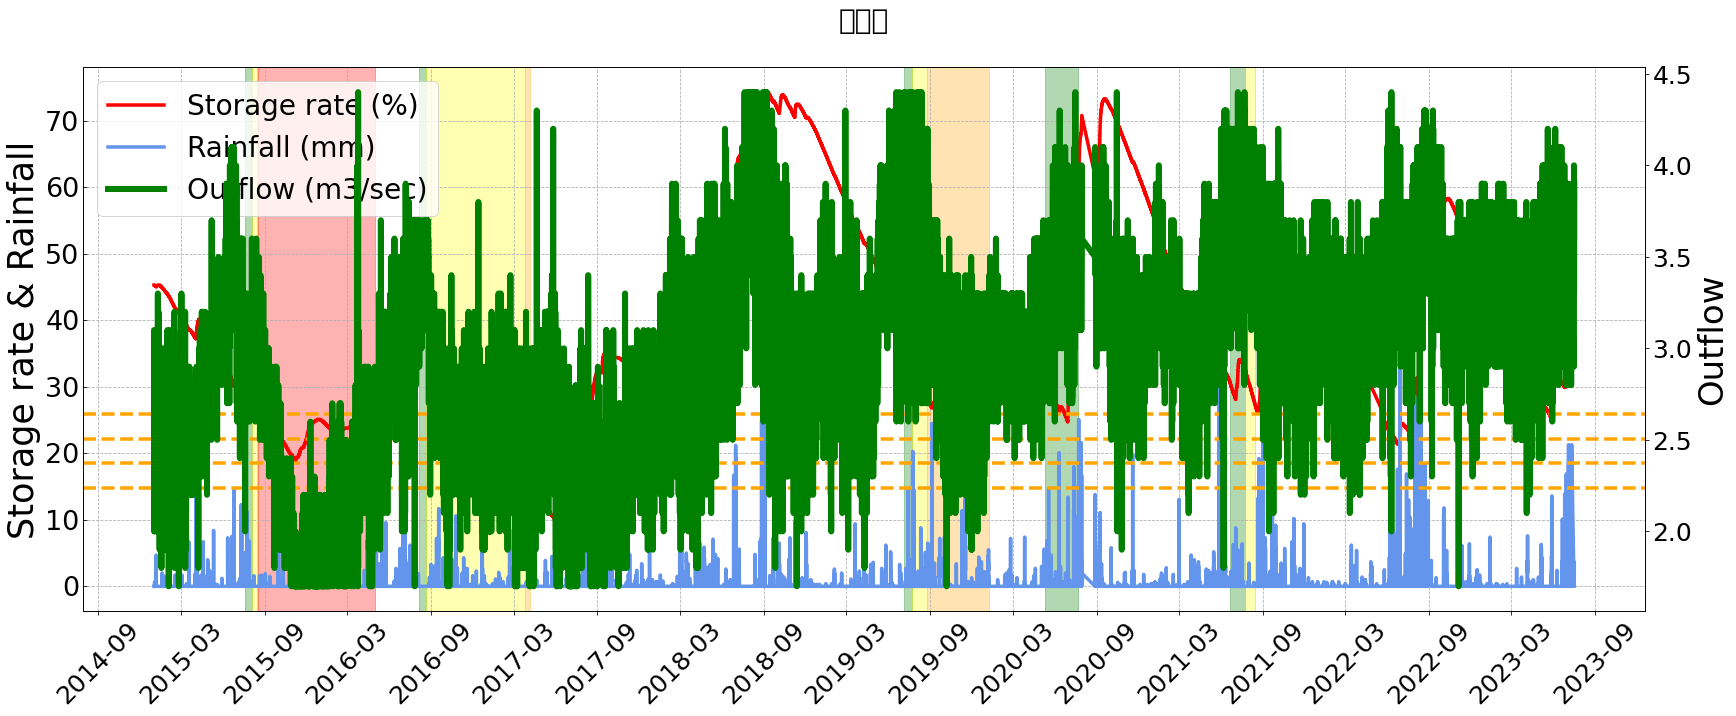

In [63]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (28, 10)
#plt.rcParams['font.size'] = 18

fig, ax1 = plt.subplots()
ax1.plot(dam['storage_rate'], label='Storage rate (%)', color='r', linewidth=3.5)
ax1.plot(dam['rainfall'], label='Rainfall (mm)', color='cornflowerblue', linewidth=3.5)
ax1.axhline(y=25.9, color='orange', linestyle='--', linewidth=3.5)  # 70% 선
ax1.axhline(y=22.2, color='orange', linestyle='--', linewidth=3.5)  # 60% 선
ax1.axhline(y=18.5, color='orange', linestyle='--', linewidth=3.5)  # 50% 선
ax1.axhline(y=14.8, color='orange', linestyle='--', linewidth=3.5)  # 40% 선

ax1.set_ylabel('Storage rate & Rainfall', fontsize=35)
ax1.tick_params(axis='y', direction='in', labelsize=27)
ax1.tick_params(axis='x', rotation=45, labelsize=25)

ax2 = ax1.twinx()
ax2.plot(dam['outflow'], label='Outflow (m3/sec)', color='g', linewidth=6)
ax2.set_ylabel('Outflow', fontsize=34)
ax2.tick_params(axis='y', labelsize=27)

ax1.set_title('보령댐\n', fontsize=28)
plt.xticks(fontsize=23)
plt.yticks(fontsize=25)
#plt.grid(True)

# 가로세로 그리드 그리기
ax1.grid(which='both', linestyle='--')

# 1
date_range_start = '2015-07-20'
date_range_end = '2015-08-04'
ax1.axvspan(date_range_start, date_range_end, alpha=0.3, color='green')
# 특정 기간 백그라운드 색 나타내기
date_range_start = '2015-08-04'
date_range_end = '2015-08-15'
ax1.axvspan(date_range_start, date_range_end, alpha=0.3, color='yellow')
# 특정 기간 백그라운드 색 나타내기
date_range_start = '2015-08-15'
date_range_end = '2015-08-18'
ax1.axvspan(date_range_start, date_range_end, alpha=0.3, color='orange')
# 특정 기간 백그라운드 색 나타내기
date_range_start = '2015-08-18'
date_range_end = '2016-05-01'
ax1.axvspan(date_range_start, date_range_end, alpha=0.3, color='red')

# 2
date_range_start = '2016-08-06'
date_range_end = '2016-08-21'
ax1.axvspan(date_range_start, date_range_end, alpha=0.3, color='green')
# 특정 기간 백그라운드 색 나타내기
date_range_start = '2016-08-21'
date_range_end = '2017-03-25'
ax1.axvspan(date_range_start, date_range_end, alpha=0.3, color='yellow')
# 특정 기간 백그라운드 색 나타내기
date_range_start = '2017-03-25'
date_range_end = '2017-04-06'
ax1.axvspan(date_range_start, date_range_end, alpha=0.3, color='orange')

# 3
date_range_start = '2019-07-07'
date_range_end = '2019-07-24'
ax1.axvspan(date_range_start, date_range_end, alpha=0.3, color='green')
# 특정 기간 백그라운드 색 나타내기
date_range_start = '2019-07-24'
date_range_end = '2019-08-26'
ax1.axvspan(date_range_start, date_range_end, alpha=0.3, color='yellow')
# 특정 기간 백그라운드 색 나타내기
date_range_start = '2019-08-26'
date_range_end = '2020-01-08'
ax1.axvspan(date_range_start, date_range_end, alpha=0.3, color='orange')

# 4
date_range_start = '2020-05-10'
date_range_end = '2020-07-23'
ax1.axvspan(date_range_start, date_range_end, alpha=0.3, color='green')

#5
date_range_start = '2021-06-21'
date_range_end = '2021-07-25'
ax1.axvspan(date_range_start, date_range_end, alpha=0.3, color='green')
# 특정 기간 백그라운드 색 나타내기
date_range_start = '2021-07-25'
date_range_end = '2021-08-16'
ax1.axvspan(date_range_start, date_range_end, alpha=0.3, color='yellow')
# 특정 기간 백그라운드 색 나타내기
date_range_start = '2021-08-16'
date_range_start = '2021-08-16'
ax1.axvspan(date_range_start, date_range_end, alpha=0.3, color='orange')

# 범례 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=28)

# x축 날짜 포맷팅 - 모든 월 표시
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
date_formatter = mdates.DateFormatter("%Y-%m")
ax1.xaxis.set_major_formatter(date_formatter)

#ax1.set_zorder(ax1.get_zorder() + 10)
#ax1.patch.set_visible(False)

plt.show()

# 데이터 정규화 Normalization

데이터의 범위를 0에서 1로 변경하여 데이터 값들의 편차를 줄임

In [64]:
dam

,date,water_level,rainfall,inflow,outflow,storage,storage_rate
date,,,,,,,
2015-01-01 01:00:00,2015-01-01 01:00:00,66.12,0.0,2.6,2.6,53.00,45.3
2015-01-01 02:00:00,2015-01-01 02:00:00,66.12,0.0,3.0,3.0,53.00,45.3
2015-01-01 03:00:00,2015-01-01 03:00:00,66.12,0.0,3.1,3.1,53.00,45.3
2015-01-01 04:00:00,2015-01-01 04:00:00,66.12,0.0,3.0,3.0,53.00,45.3
2015-01-01 05:00:00,2015-01-01 05:00:00,66.12,0.0,2.9,2.9,53.00,45.3
...,...,...,...,...,...,...,...
2023-07-17 03:00:00,2023-07-17 03:00:00,69.66,0.0,31.7,3.6,66.28,56.7
2023-07-17 04:00:00,2023-07-17 04:00:00,69.68,0.3,32.0,3.8,66.38,56.8
2023-07-17 05:00:00,2023-07-17 05:00:00,69.70,1.0,29.5,3.9,66.48,56.9


In [65]:
features = dam[['rainfall', 'inflow', 'outflow', 'storage', 'storage_rate']]
print(features)

                     rainfall  inflow  outflow  storage  storage_rate
date                                                                 
2015-01-01 01:00:00       0.0     2.6      2.6    53.00          45.3
2015-01-01 02:00:00       0.0     3.0      3.0    53.00          45.3
2015-01-01 03:00:00       0.0     3.1      3.1    53.00          45.3
2015-01-01 04:00:00       0.0     3.0      3.0    53.00          45.3
2015-01-01 05:00:00       0.0     2.9      2.9    53.00          45.3
...                       ...     ...      ...      ...           ...
2023-07-17 03:00:00       0.0    31.7      3.6    66.28          56.7
2023-07-17 04:00:00       0.3    32.0      3.8    66.38          56.8
2023-07-17 05:00:00       1.0    29.5      3.9    66.48          56.9
2023-07-17 06:00:00       2.0    32.1      3.9    66.58          57.0
2023-07-17 07:00:00       3.6    32.2      3.9    66.68          57.0

[73071 rows x 5 columns]


In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(features)
dam_scaled=scaler.transform(features)

dam_scaled=pd.DataFrame(data=dam_scaled, columns=list(features))
print('feature 최솟값')
print(dam_scaled.min())
print('\n''fearure 최댓값')
print(dam_scaled.max())

feature 최솟값
rainfall        0.0
inflow          0.0
outflow         0.0
storage         0.0
storage_rate    0.0
dtype: float64

fearure 최댓값
rainfall        1.0
inflow          1.0
outflow         1.0
storage         1.0
storage_rate    1.0
dtype: float64


# 입력 변수의 관계를 이용하여  저수량 변화를 계산: Rainfall + Inflow - Outflow

In [67]:
dam['variation'] = 0
for i, idx in enumerate(dam.index):
    dam.loc[idx, 'variation'] = dam_scaled['rainfall'][i]+dam_scaled['inflow'][i]-dam_scaled['outflow'][i]

In [68]:
dam_scaled

,rainfall,inflow,outflow,storage,storage_rate
0,0.000000,0.003025,0.333333,0.561010,0.560606
1,0.000000,0.003490,0.481481,0.561010,0.560606
2,0.000000,0.003607,0.518519,0.561010,0.560606
3,0.000000,0.003490,0.481481,0.561010,0.560606
4,0.000000,0.003374,0.444444,0.561010,0.560606
...,...,...,...,...,...
73066,0.000000,0.036882,0.703704,0.733031,0.733333
73067,0.006329,0.037231,0.777778,0.734326,0.734848
73068,0.021097,0.034322,0.814815,0.735622,0.736364
73069,0.042194,0.037347,0.814815,0.736917,0.737879


In [69]:
dam = dam.reset_index(drop=True)

In [70]:
df = dam['variation']
df

0       -0.330308
1       -0.477991
2       -0.514912
3       -0.477991
4       -0.441070
           ...   
73066   -0.666822
73067   -0.734218
73068   -0.759395
73069   -0.735273
73070   -0.701402
Name: variation, Length: 73071, dtype: float64

In [71]:
ds_list = []

for i in range(1,len(df)):
    ds = df[i]-df[i-1]
    ds_list.append(ds)
    
ds_dt = pd.DataFrame(ds_list)

In [72]:
ds_dt.columns = ['ds_dt']
print(ds_dt)

          ds_dt
0     -0.147683
1     -0.036921
2      0.036921
3      0.036921
4      0.036921
...         ...
73065  0.000465
73066 -0.067396
73067 -0.025178
73068  0.024122
73069  0.033872

[73070 rows x 1 columns]


In [73]:
ds_dt['ds_dt'] = pd.to_numeric(ds_dt['ds_dt'],errors='coerce')
print(ds_dt)

          ds_dt
0     -0.147683
1     -0.036921
2      0.036921
3      0.036921
4      0.036921
...         ...
73065  0.000465
73066 -0.067396
73067 -0.025178
73068  0.024122
73069  0.033872

[73070 rows x 1 columns]


In [74]:
dam = dam[1:]

In [75]:
dam_scaled = dam_scaled[1:]

In [76]:
dam = dam.reset_index(drop=True)
print(dam)

                     date  water_level  rainfall  inflow  outflow  storage  \
0     2015-01-01 02:00:00        66.12       0.0     3.0      3.0    53.00   
1     2015-01-01 03:00:00        66.12       0.0     3.1      3.1    53.00   
2     2015-01-01 04:00:00        66.12       0.0     3.0      3.0    53.00   
3     2015-01-01 05:00:00        66.12       0.0     2.9      2.9    53.00   
4     2015-01-01 06:00:00        66.12       0.0     2.8      2.8    53.00   
...                   ...          ...       ...     ...      ...      ...   
73065 2023-07-17 03:00:00        69.66       0.0    31.7      3.6    66.28   
73066 2023-07-17 04:00:00        69.68       0.3    32.0      3.8    66.38   
73067 2023-07-17 05:00:00        69.70       1.0    29.5      3.9    66.48   
73068 2023-07-17 06:00:00        69.72       2.0    32.1      3.9    66.58   
73069 2023-07-17 07:00:00        69.74       3.6    32.2      3.9    66.68   

       storage_rate  variation  
0              45.3  -0.477991

In [77]:
dam_scaled = dam_scaled.reset_index(drop=True)
print(dam_scaled)

       rainfall    inflow   outflow   storage  storage_rate
0      0.000000  0.003490  0.481481  0.561010      0.560606
1      0.000000  0.003607  0.518519  0.561010      0.560606
2      0.000000  0.003490  0.481481  0.561010      0.560606
3      0.000000  0.003374  0.444444  0.561010      0.560606
4      0.000000  0.003258  0.407407  0.561010      0.560606
...         ...       ...       ...       ...           ...
73065  0.000000  0.036882  0.703704  0.733031      0.733333
73066  0.006329  0.037231  0.777778  0.734326      0.734848
73067  0.021097  0.034322  0.814815  0.735622      0.736364
73068  0.042194  0.037347  0.814815  0.736917      0.737879
73069  0.075949  0.037464  0.814815  0.738212      0.737879

[73070 rows x 5 columns]


In [78]:
dam['ds_dt'] = ds_dt

In [79]:
dam_scaled['ds_dt'] = ds_dt
dam_scaled['obs_storage_rate'] = dam['storage_rate']

In [80]:
print(dam)

                     date  water_level  rainfall  inflow  outflow  storage  \
0     2015-01-01 02:00:00        66.12       0.0     3.0      3.0    53.00   
1     2015-01-01 03:00:00        66.12       0.0     3.1      3.1    53.00   
2     2015-01-01 04:00:00        66.12       0.0     3.0      3.0    53.00   
3     2015-01-01 05:00:00        66.12       0.0     2.9      2.9    53.00   
4     2015-01-01 06:00:00        66.12       0.0     2.8      2.8    53.00   
...                   ...          ...       ...     ...      ...      ...   
73065 2023-07-17 03:00:00        69.66       0.0    31.7      3.6    66.28   
73066 2023-07-17 04:00:00        69.68       0.3    32.0      3.8    66.38   
73067 2023-07-17 05:00:00        69.70       1.0    29.5      3.9    66.48   
73068 2023-07-17 06:00:00        69.72       2.0    32.1      3.9    66.58   
73069 2023-07-17 07:00:00        69.74       3.6    32.2      3.9    66.68   

       storage_rate  variation     ds_dt  
0              45.3 

In [81]:
print(dam_scaled)

       rainfall    inflow   outflow   storage  storage_rate     ds_dt  \
0      0.000000  0.003490  0.481481  0.561010      0.560606 -0.147683   
1      0.000000  0.003607  0.518519  0.561010      0.560606 -0.036921   
2      0.000000  0.003490  0.481481  0.561010      0.560606  0.036921   
3      0.000000  0.003374  0.444444  0.561010      0.560606  0.036921   
4      0.000000  0.003258  0.407407  0.561010      0.560606  0.036921   
...         ...       ...       ...       ...           ...       ...   
73065  0.000000  0.036882  0.703704  0.733031      0.733333  0.000465   
73066  0.006329  0.037231  0.777778  0.734326      0.734848 -0.067396   
73067  0.021097  0.034322  0.814815  0.735622      0.736364 -0.025178   
73068  0.042194  0.037347  0.814815  0.736917      0.737879  0.024122   
73069  0.075949  0.037464  0.814815  0.738212      0.737879  0.033872   

       obs_storage_rate  
0                  45.3  
1                  45.3  
2                  45.3  
3                  

In [82]:
dam["date"] = pd.to_datetime(dam["date"])

In [83]:
dam.index = dam["date"]

# 데이터 시각화

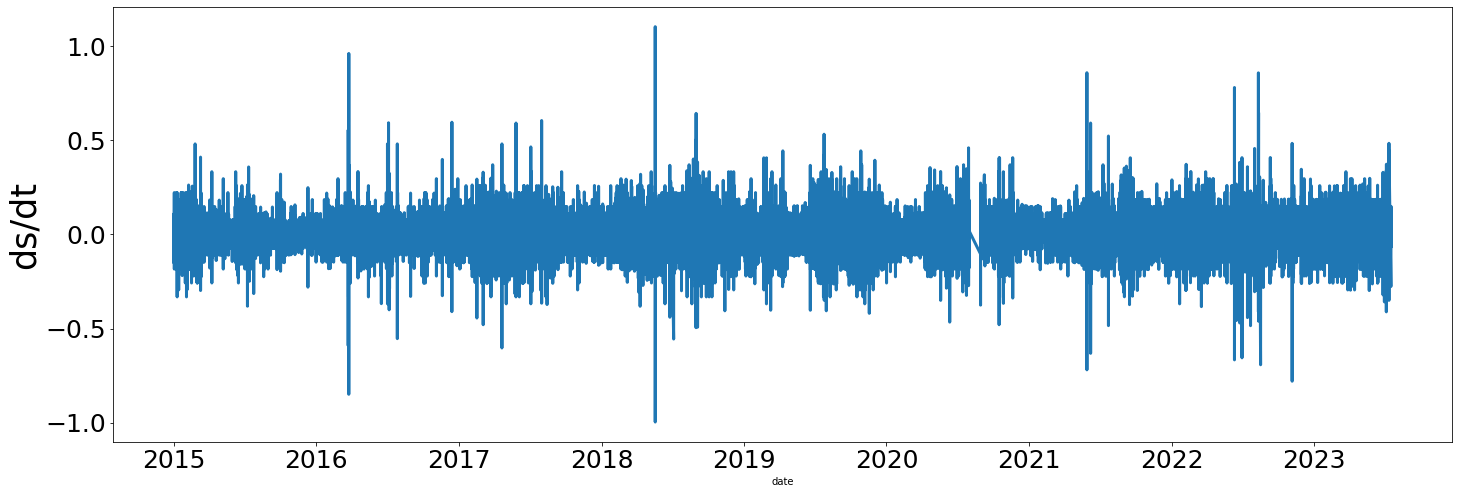

In [84]:
plt.figure(figsize=(24,8))

dam_o = sns.lineplot(data=dam['ds_dt'], linewidth=3)
plt.ylabel('ds/dt',fontsize = 35)
#plt.xlabel('Date', fontsize =17)
plt.xticks(fontsize =25)
plt.yticks(fontsize =25)
#plt.grid(True)
dam_o.xaxis.set_major_locator(mdates.YearLocator())
dam_o.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

<Figure size 2016x720 with 0 Axes>

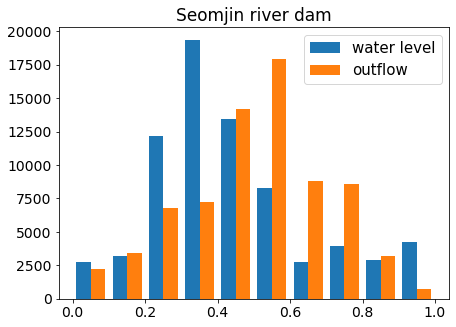

<Figure size 2016x720 with 0 Axes>

In [85]:
plt.figure(figsize=(7,5))
plt.hist((dam_scaled.storage_rate, dam_scaled.outflow), histtype='bar', label=['water level','outflow']) 
plt.title('Seomjin river dam', fontsize = 17)
plt.legend(fontsize=15)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
plt.figure()

# 베이지안을 통해 최적화된 하이퍼파라미터를 적용하여 모델 학습 및 예측 수행

In [86]:
dam_scaled.describe()

,rainfall,inflow,outflow,storage,storage_rate,ds_dt,obs_storage_rate
count,73070.000000,73070.000000,73070.000000,73070.000000,73070.000000,73070.000000,73070.000000
mean,0.002878,0.004625,0.501426,0.443312,0.443473,-0.000005,37.569214
std,0.021095,0.013081,0.192893,0.218329,0.218458,0.060750,14.418249
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.996393,8.300000
25%,0.000000,0.002327,0.370370,0.299611,0.300000,-0.009420,28.100000
50%,0.000000,0.003258,0.518519,0.394430,0.393939,0.000000,34.300000
75%,0.000000,0.003839,0.629630,0.530699,0.530303,0.004538,43.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.102075,74.300000


In [87]:
74936*0.8

59948.8

In [88]:
dam_scaled.describe()

,rainfall,inflow,outflow,storage,storage_rate,ds_dt,obs_storage_rate
count,73070.000000,73070.000000,73070.000000,73070.000000,73070.000000,73070.000000,73070.000000
mean,0.002878,0.004625,0.501426,0.443312,0.443473,-0.000005,37.569214
std,0.021095,0.013081,0.192893,0.218329,0.218458,0.060750,14.418249
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.996393,8.300000
25%,0.000000,0.002327,0.370370,0.299611,0.300000,-0.009420,28.100000
50%,0.000000,0.003258,0.518519,0.394430,0.393939,0.000000,34.300000
75%,0.000000,0.003839,0.629630,0.530699,0.530303,0.004538,43.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.102075,74.300000


In [89]:
#train과 test set 분리
train=dam_scaled[:59949]
test=dam_scaled[59949:74936]

In [90]:
dam_scaled

,rainfall,inflow,outflow,storage,storage_rate,ds_dt,obs_storage_rate
0,0.000000,0.003490,0.481481,0.561010,0.560606,-0.147683,45.3
1,0.000000,0.003607,0.518519,0.561010,0.560606,-0.036921,45.3
2,0.000000,0.003490,0.481481,0.561010,0.560606,0.036921,45.3
3,0.000000,0.003374,0.444444,0.561010,0.560606,0.036921,45.3
4,0.000000,0.003258,0.407407,0.561010,0.560606,0.036921,45.3
...,...,...,...,...,...,...,...
73065,0.000000,0.036882,0.703704,0.733031,0.733333,0.000465,56.7
73066,0.006329,0.037231,0.777778,0.734326,0.734848,-0.067396,56.8
73067,0.021097,0.034322,0.814815,0.735622,0.736364,-0.025178,56.9
73068,0.042194,0.037347,0.814815,0.736917,0.737879,0.024122,57.0


In [91]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [92]:
print(dam_scaled.shape)


(73070, 7)


In [93]:
# 1. 필요한 라이브러리 임포트
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [94]:
# 2. SMAPE 함수 정의
def smape(A, F):
    return 100 * np.mean(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))



In [95]:
# 3. 데이터 준비 및 처리

# 가정: dam_scaled는 이미 정의된 DataFrame이며, 필요한 column들이 존재합니다.
features = ["rainfall", "inflow", "outflow", "ds_dt"]
output = "obs_storage_rate"

In [96]:
X = dam_scaled[features]
y = dam_scaled[output]

In [97]:
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [98]:
print(X_test.shape)

(14614, 4)


In [99]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
# 2. Hyperparameter tuning with 10-fold CV

# XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_search = GridSearchCV(XGBRegressor(), xgb_param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1)
xgb_search.fit(X_train_scaled, y_train)
xgb_model = xgb_search.best_estimator_

# LightGBM
lgbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 62, 93],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

lgbm_search = GridSearchCV(LGBMRegressor(verbose=-1), lgbm_param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1)
lgbm_search.fit(X_train_scaled, y_train)
lgbm_model = lgbm_search.best_estimator_

# CatBoost
cat_param_grid = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

cat_search = GridSearchCV(CatBoostRegressor(verbose=0), cat_param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1)
cat_search.fit(X_train_scaled, y_train)
catboost_model = cat_search.best_estimator_

# Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_search = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1)
rf_search.fit(X_train_scaled, y_train)
rf_model = rf_search.best_estimator_

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Fitting 10 folds for each of 729 candidates, totalling 7290 fits
Fitting 10 folds for each of 81 candidates, totalling 810 fits
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


In [102]:
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_smape = smape(y_test, xgb_pred)
lgbm_pred = lgbm_model.predict(X_test_scaled)
lgbm_smape = smape(y_test, lgbm_pred)
cat_pred = catboost_model.predict(X_test_scaled)
cat_smape = smape(y_test, cat_pred)
rf_pred = rf_model.predict(X_test_scaled)
rf_smape = smape(y_test, rf_pred)

print(f"SMAPE for XGBoost: {xgb_smape}")
print(f"SMAPE for LightGBM: {lgbm_smape}")
print(f"SMAPE for Catboost: {cat_smape}")
print(f"SMAPE for RandomForest: {rf_smape}")

SMAPE for XGBoost: 26.131444212526695
SMAPE for LightGBM: 25.99987791947635
SMAPE for Catboost: 26.94618134706774
SMAPE for RandomForest: 27.404466553782207


In [103]:
# 5. Weighted Ensemble
xgb_weight = 1 / xgb_smape
lgbm_weight = 1 / lgbm_smape
cat_weight = 1 / cat_smape
rf_weight = 1 / rf_smape

ensemble_pred = (xgb_pred * xgb_weight + lgbm_pred * lgbm_weight + cat_pred * cat_weight + rf_pred * rf_weight) / (xgb_weight + lgbm_weight + cat_weight + rf_weight)
ensemble_smape = smape(y_test, ensemble_pred)


In [104]:
print(f"SMAPE for XGBoost: {xgb_smape}")
print(f"SMAPE for LightGBM: {lgbm_smape}")
print(f"SMAPE for Catboost: {cat_smape}")
print(f"SMAPE for RandomForest: {rf_smape}")
print(f"SMAPE for Ensemble: {ensemble_smape}")


SMAPE for XGBoost: 26.131444212526695
SMAPE for LightGBM: 25.99987791947635
SMAPE for Catboost: 26.94618134706774
SMAPE for RandomForest: 27.404466553782207
SMAPE for Ensemble: 26.49878577993506


RMSE for XGBoost: 11.9390
RMSE for LightGBM: 11.8262
RMSE for Catboost: 12.0986
RMSE for Catboost: 12.0986
RMSE for Ensemble: 12.0184


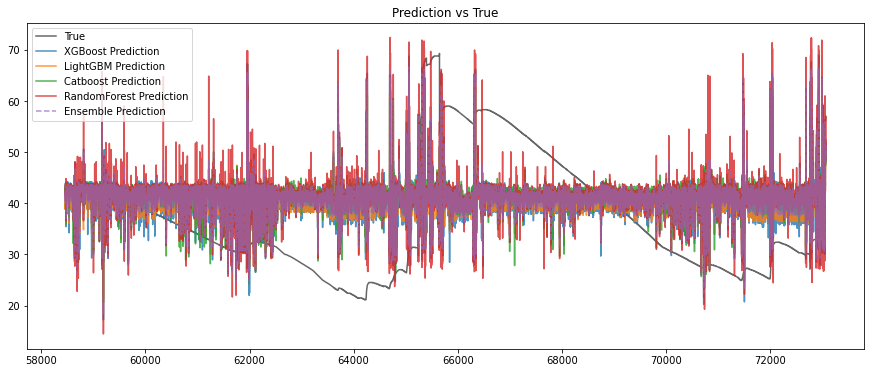

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# RMSE 계산 함수 정의
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 예측값과 실제값 비교를 위한 데이터프레임 생성
results = pd.DataFrame({
    'True': y_test,
    'XGBoost Prediction': xgb_pred,
    'LightGBM Prediction': lgbm_pred,
    'Catboost Prediction' : cat_pred,
    'RandomForest Prediction' : rf_pred,
    'Ensemble Prediction': ensemble_pred
})

# RMSE 계산
xgb_rmse = rmse(y_test, xgb_pred)
lgbm_rmse = rmse(y_test, lgbm_pred)
cat_rmse = rmse(y_test, cat_pred)
rf_rmse = rmse(y_test, rf_pred)
ensemble_rmse = rmse(y_test, ensemble_pred)

print(f"RMSE for XGBoost: {xgb_rmse:.4f}")
print(f"RMSE for LightGBM: {lgbm_rmse:.4f}")
print(f"RMSE for Catboost: {cat_rmse:.4f}")
print(f"RMSE for Catboost: {cat_rmse:.4f}")
print(f"RMSE for Ensemble: {ensemble_rmse:.4f}")

# 시각화
plt.figure(figsize=(15, 6))

plt.plot(results['True'], label='True', color='black', alpha=0.6)
plt.plot(results['XGBoost Prediction'], label='XGBoost Prediction', alpha=0.8)
plt.plot(results['LightGBM Prediction'], label='LightGBM Prediction', alpha=0.8)
plt.plot(results['Catboost Prediction'], label='Catboost Prediction', alpha=0.8)
plt.plot(results['RandomForest Prediction'], label='RandomForest Prediction', alpha=0.8)
plt.plot(results['Ensemble Prediction'], label='Ensemble Prediction', linestyle='dashed', alpha=0.7)
plt.title("Prediction vs True")
plt.legend()
plt.show()


RMSE between True values and Ensemble Predictions on Test Set: 12.0184


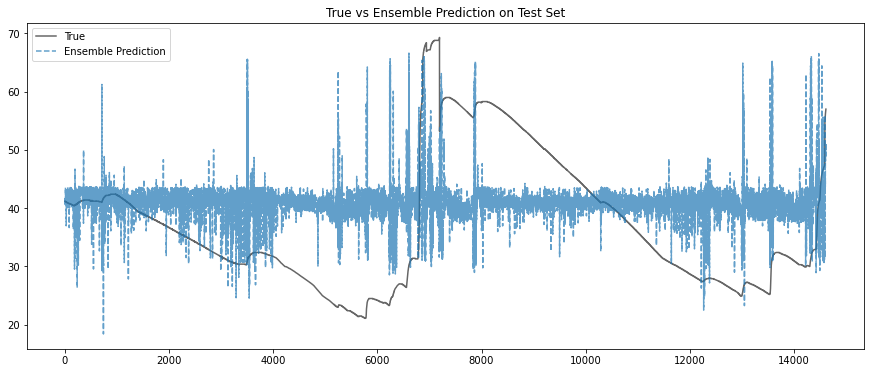

In [106]:
from sklearn.metrics import mean_squared_error

# RMSE 계산
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))
print(f"RMSE between True values and Ensemble Predictions on Test Set: {ensemble_rmse:.4f}")

# 그래프로 표현
plt.figure(figsize=(15, 6))

plt.plot(y_test.reset_index(drop=True), label='True', color='black', alpha=0.6)
plt.plot(ensemble_pred, label='Ensemble Prediction', linestyle='dashed', alpha=0.7)
plt.title("True vs Ensemble Prediction on Test Set")
plt.legend()
plt.show()


In [107]:
# 예측값과 실제값 비교를 위한 데이터프레임 생성
results_test_df = pd.DataFrame({
    'True Values': y_test.values,
    'Ensemble Predictions': ensemble_pred
})

# 처음 20개 데이터를 출력해보겠습니다.
print(results_test_df.head(100))


    True Values  Ensemble Predictions
0          41.2             40.749529
1          41.2             41.250438
2          41.2             40.843386
3          41.2             41.800607
4          41.2             40.491349
..          ...                   ...
95         40.7             41.274211
96         40.7             41.250438
97         40.7             41.250438
98         40.7             41.250438
99         40.7             43.544108

[100 rows x 2 columns]


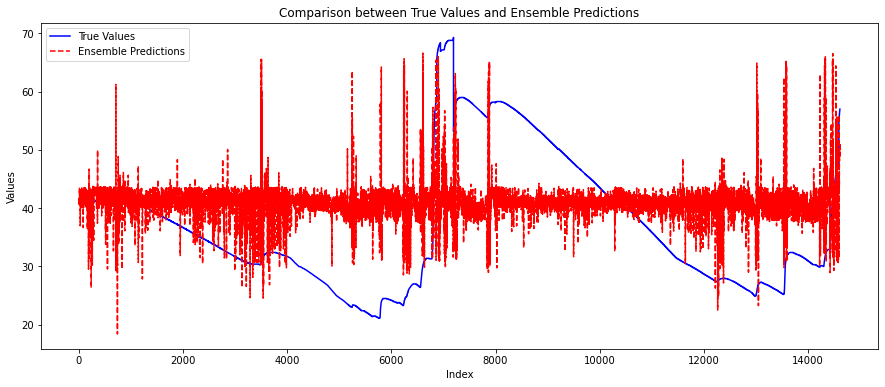

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

# 실제 값과 앙상블 예측값을 그래프에 표시
plt.plot(results_test_df['True Values'], label='True Values', color='blue')
plt.plot(results_test_df['Ensemble Predictions'], label='Ensemble Predictions', color='red', linestyle='dashed')

# 그래프 제목 및 라벨 설정
plt.title('Comparison between True Values and Ensemble Predictions')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()

# 그래프 출력
plt.show()


In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0 # MAPE는 실제값이 0일 때 무한대가 되므로 이를 방지하기 위한 조치
    return np.mean(np.abs((y_true[non_zero_index] - y_pred[non_zero_index]) / y_true[non_zero_index])) * 100

# 계산
mae = mean_absolute_error(results_test_df['True Values'], results_test_df['Ensemble Predictions'])
mape = mean_absolute_percentage_error(results_test_df['True Values'], results_test_df['Ensemble Predictions'])
mse = mean_squared_error(results_test_df['True Values'], results_test_df['Ensemble Predictions'])
rmse = np.sqrt(mse)
rmsle = np.sqrt(mean_squared_log_error(results_test_df['True Values'], results_test_df['Ensemble Predictions']))
r2 = r2_score(results_test_df['True Values'], results_test_df['Ensemble Predictions'])

# 출력
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Root Mean Squared Log Error (RMSLE): {rmsle}")
print(f"R squared (R^2): {r2}")


Mean Absolute Error (MAE): 10.127640744839763
Mean Absolute Percentage Error (MAPE): 30.368099058717196%
Mean Squared Error (MSE): 144.4413442656768
Root Mean Squared Error (RMSE): 12.018375275621777
Root Mean Squared Log Error (RMSLE): 0.3097407667703064
R squared (R^2): -0.1504540534923431


R^2: -0.1505


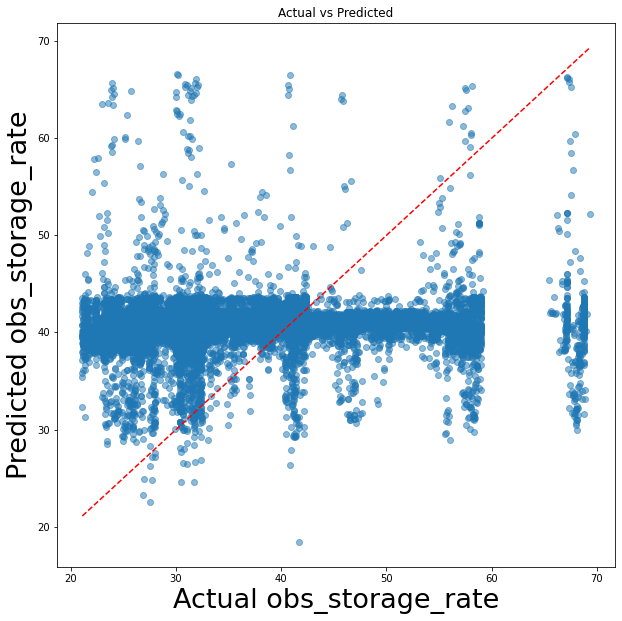

In [110]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# R^2 계산
r2 = r2_score(results_test_df['True Values'], results_test_df['Ensemble Predictions'])
print(f"R^2: {r2:.4f}")

# Scatter plot 그리기
plt.figure(figsize=(10,10))
plt.scatter(results_test_df['True Values'], results_test_df['Ensemble Predictions'], alpha=0.5)
plt.plot([results_test_df['True Values'].min(), results_test_df['True Values'].max()], 
         [results_test_df['True Values'].min(), results_test_df['True Values'].max()], 'r--')
plt.xlabel('Actual obs_storage_rate', fontsize=27)
plt.ylabel('Predicted obs_storage_rate', fontsize=27)
plt.title('Actual vs Predicted')
plt.show()


In [111]:
# 최적의 alpha 값을 찾기 위한 그리드 서치
alphas = np.linspace(0.01, 1, 100)  # 0.01부터 1까지 100개의 alpha 값
best_alpha = alphas[0]
min_rmse = float('inf')

for alpha in alphas:
    ensemble_pred_ewm_current = pd.Series(ensemble_pred).ewm(alpha=alpha).mean().values
    rmse_current = np.sqrt(mean_squared_error(y_test, ensemble_pred_ewm_current))
    if rmse_current < min_rmse:
        min_rmse = rmse_current
        best_alpha = alpha

print(f"Best alpha: {best_alpha:.4f}")
print(f"Minimum RMSE with best alpha: {min_rmse:.4f}")

Best alpha: 0.0100
Minimum RMSE with best alpha: 11.6141


RMSE between True values and EWMA Ensemble Predictions on Test Set: 11.6519


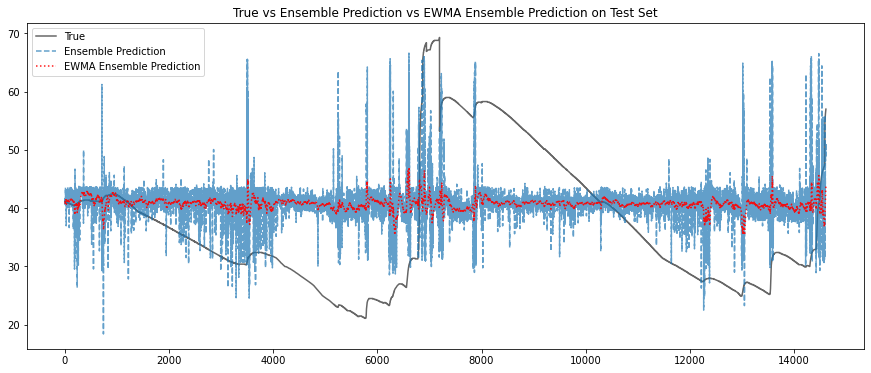

In [112]:
# 지수 가중 이동 평균 적용
alpha = 0.04  # alpha는 smoothing factor로서, [0, 1] 범위에 있으며 작은 값은 과거의 값에 더 많은 가중치를 부여합니다.
ensemble_pred_ewm = pd.Series(ensemble_pred).ewm(alpha=alpha).mean().values

# RMSE for EWMA predictions
ensemble_ewm_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred_ewm))
print(f"RMSE between True values and EWMA Ensemble Predictions on Test Set: {ensemble_ewm_rmse:.4f}")

# 그래프로 표현
plt.figure(figsize=(15, 6))
plt.plot(y_test.reset_index(drop=True), label='True', color='black', alpha=0.6)
plt.plot(ensemble_pred, label='Ensemble Prediction', linestyle='dashed', alpha=0.7)
plt.plot(ensemble_pred_ewm, label='EWMA Ensemble Prediction', linestyle='dotted', alpha=0.9, color='red')
plt.title("True vs Ensemble Prediction vs EWMA Ensemble Prediction on Test Set")
plt.legend()
plt.show()

In [113]:
# R^2 value for EWMA predictions with span
ensemble_ewm_span_r2 = r2_score(y_test, ensemble_pred_ewm)
print(f"R^2 score between True values and EWMA Ensemble Predictions with span on Test Set: {ensemble_ewm_span_r2:.4f}")

# RMSE for EWMA predictions with span
ensemble_ewm_span_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred_ewm))
print(f"RMSE between True values and EWMA Ensemble Predictions with span on Test Set: {ensemble_ewm_span_rmse:.4f}")

R^2 score between True values and EWMA Ensemble Predictions with span on Test Set: -0.0814
RMSE between True values and EWMA Ensemble Predictions with span on Test Set: 11.6519


In [82]:
#sequence length 및 Input과 Output으로 사용할 시점 설정 (window_size는 sequence length를 의미함)
def make_dataset(data, label, window_size=72):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [83]:
#Input과 Output으로 사용할 변수 설정
feature_cols = ['rainfall', 'inflow', 'outflow', 'ds_dt']
label_cols = ['obs_storage_rate']

train_feature = train[feature_cols]
train_label = train[label_cols]

test_feature = test[feature_cols]
test_label = test[label_cols]


In [81]:
x_train, y_train = make_dataset(train_feature,train_label,72) #make_dataset(input, output, window_size)

In [82]:
x_test, y_test = make_dataset(test_feature,test_label,72)

In [83]:
test_feature.shape

(0, 4)

scaler = MinMaxScaler(feature_range=(-1, 1))

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# 4. 각 모델 (XGBoost, LightGBM) 학습 후 예측

# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_smape = smape(y_test, xgb_pred)

# LightGBM
lgbm_model = LGBMRegressor(verbose=-1)
lgbm_model.fit(X_train_scaled, y_train)
lgbm_pred = lgbm_model.predict(X_test_scaled)
lgbm_smape = smape(y_test, lgbm_pred)

# CatBoost
catboost_model = CatBoostRegressor(verbose=0)
catboost_model.fit(X_train_scaled, y_train)
cat_pred = catboost_model.predict(X_test_scaled)
cat_smape = smape(y_test, cat_pred)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_smape = smape(y_test, rf_pred)


print(f"SMAPE for XGBoost: {xgb_smape}")
print(f"SMAPE for LightGBM: {lgbm_smape}")
print(f"SMAPE for Catboost: {cat_smape}")
print(f"SMAPE for RandomForest: {rf_smape}")

모델 구조 및 하이퍼파라미터 설정

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU #LSTM의 경우 GEU단어를 LSTM로 고쳐주면 됨

model_bor = Sequential()
model_bor.add(GRU(128, #LSTM
               input_shape=(x_train.shape[1], x_train.shape[2]), 
               activation='relu', 
               return_sequences=True)) 
model_bor.add(GRU(64, #LSTM
               input_shape=(x_train.shape[1], x_train.shape[2]), 
               activation='relu',
               return_sequences=False))
model_bor.add(Dense(1)) #() output갯수

모델학습

In [ ]:
model_bor.compile(loss='mean_squared_error', optimizer='adam')


history = model_bor.fit(x_train, y_train, 
                    epochs=50, 
                    batch_size=128)

Epoch 1/50
468/468 [==============================] - 31s 67ms/step - loss: 306.2658
Epoch 2/50
468/468 [==============================] - 32s 68ms/step - loss: 228.7883
Epoch 3/50
468/468 [==============================] - 32s 69ms/step - loss: 223.5704
Epoch 4/50
468/468 [==============================] - 33s 72ms/step - loss: 205.3147
Epoch 5/50
468/468 [==============================] - 33s 71ms/step - loss: 202.1696
Epoch 6/50
468/468 [==============================] - 34s 72ms/step - loss: 205.6330
Epoch 7/50
468/468 [==============================] - 34s 74ms/step - loss: 221.1501
Epoch 8/50
468/468 [==============================] - 34s 73ms/step - loss: 216.3354
Epoch 9/50
468/468 [==============================] - 33s 71ms/step - loss: 200.7648
Epoch 10/50
468/468 [==============================] - 33s 70ms/step - loss: 191.5273
Epoch 11/50
468/468 [==============================] - 34s 72ms/step - loss: 181.2433
Epoch 12/50
468/468 [==============================] - 35s 74ms

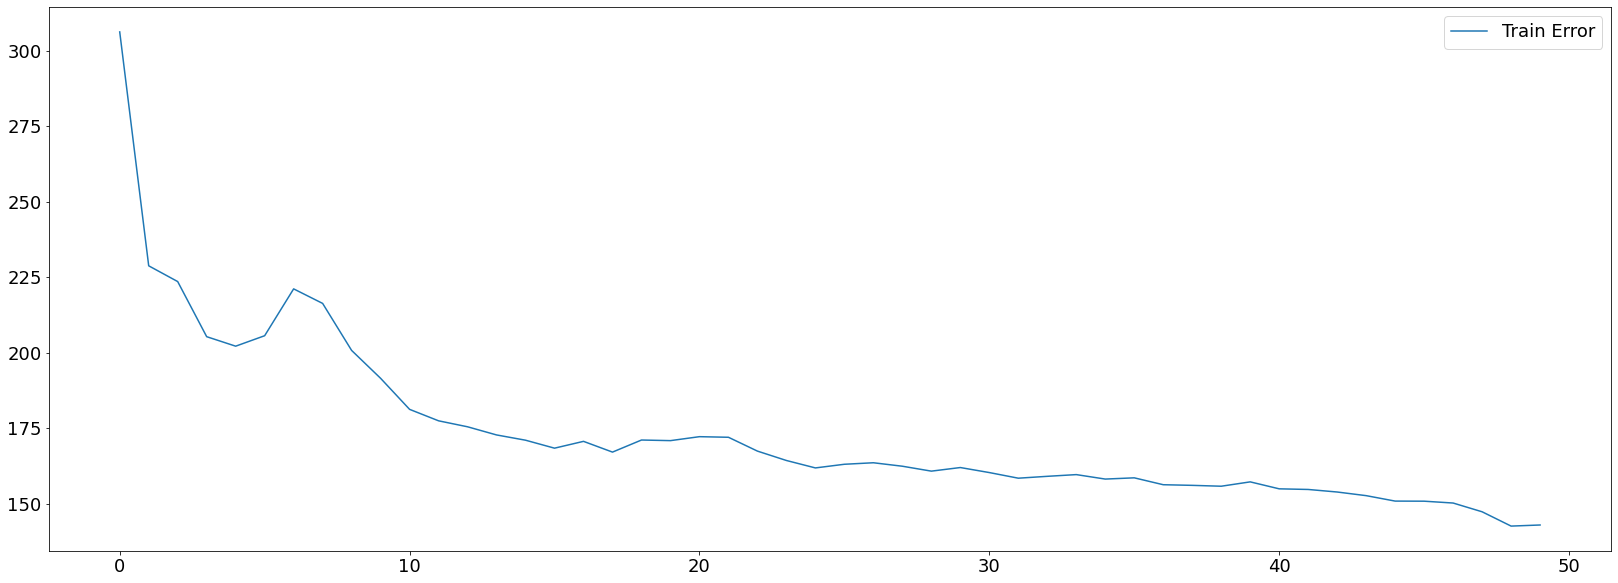

In [ ]:
loss_train = pd.DataFrame(history.history)
loss_train['epoch'] = history.epoch

plt.plot(loss_train['epoch'], loss_train['loss'],
           label='Train Error')
plt.legend()

In [ ]:
#학습된 모델을 텀퓨터에 저장하여 학습 반복없이 예측 수행할 수 있음. 학습에 시간이 오래 걸리기 때문에 모델 저장이 필요함.
#model_bor.save("model_bor.h5")

In [ ]:
# #위에서 저장했던 모델을 불러올 때 다음 코드를 실행
# from tensorflow.keras.models import load_model
# model_sm2d = load_model('model_sm2d.h5')

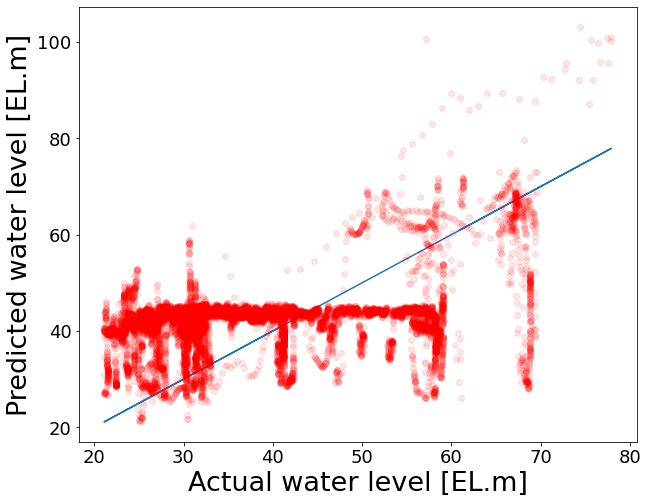

In [ ]:
plt.figure(figsize=(10,8))
predict_test  = model_bor.predict(x_test)
y = y_test
plt.plot(y_test, y)
plt.plot(y_test,predict_test, 'ro',alpha = 0.1)
plt.xlabel('Actual water level [EL.m]', fontsize =27)
plt.ylabel('Predicted water level [EL.m]', fontsize =27)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.xlim
plt.ylim
plt.show()

# 평가지표 사용

In [ ]:
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_squared_log_error

from sklearn.metrics import r2_score

from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
print("MAE : " + str(mean_absolute_error(y, predict_test)))

print("MAPE : " + str(mean_absolute_percentage_error(y, predict_test)))

print("MSE : " + str(mean_squared_error(y, predict_test)))

# RMSE
print("RMSE = ", np.sqrt(mean_squared_error(y, predict_test)))

def rmsle(y, predict_test):
    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(predict_test))))

print("RMSLE = ", rmsle(y, predict_test))

print("R2 : " + str(r2_score(y, predict_test)))

MAE : 10.34836520543292
MAPE : 0.310090175410026
MSE : 147.7902372104761
RMSE =  12.156900806146117
RMSLE =  0.3136602393919903
R2 : -0.05043511609058604


In [ ]:
import hydroeval as he
nse = he.evaluator(he.nse, predict_test, y)
kge, r, alpha, beta = he.evaluator(he.kge, predict_test, y)

print(nse, kge)

[-0.05043512] [0.22159017]


# 시계열로 예측 결과 시각화

In [ ]:
outputs_test2 = pd.DataFrame(y,columns = ['water level'])
outputs_test2['predicted water level'] = predict_test
print(outputs_test2)

       water level  predicted water level
0            95.61              95.509949
1            95.61              95.479210
2            95.61              95.475693
3            95.60              95.493027
4            95.60              95.527328
...            ...                    ...
33584       102.86             101.236557
33585       102.86             101.213852
33586       102.86             101.226036
33587       102.85             101.237587
33588       102.85             101.230774

[33589 rows x 2 columns]


In [ ]:
134643+72 #TEST 시작 기간 + window size (date 시각화를 위해)

134715

In [ ]:
oo = dam[134715:168304]

In [ ]:
Date=pd.DataFrame(oo.index)
Date['date'] = pd.to_datetime(Date.date)
print(Date)

                     date
0     2017-08-31 16:00:00
1     2017-08-31 17:00:00
2     2017-08-31 18:00:00
3     2017-08-31 19:00:00
4     2017-08-31 20:00:00
...                   ...
33584 2021-07-28 12:00:00
33585 2021-07-28 13:00:00
33586 2021-07-28 14:00:00
33587 2021-07-28 15:00:00
33588 2021-07-28 16:00:00

[33589 rows x 1 columns]


In [ ]:
outputs_test2

,water level,predicted water level
0,95.61,95.509949
1,95.61,95.479210
2,95.61,95.475693
3,95.60,95.493027
4,95.60,95.527328
...,...,...
33584,102.86,101.236557
33585,102.86,101.213852
33586,102.86,101.226036
33587,102.85,101.237587


In [ ]:
outputs_test3 = pd.concat([Date,outputs_test2],axis = 1)

outputs_test3

,date,water level,predicted water level
0,2017-08-31 16:00:00,95.61,95.509949
1,2017-08-31 17:00:00,95.61,95.479210
2,2017-08-31 18:00:00,95.61,95.475693
3,2017-08-31 19:00:00,95.60,95.493027
4,2017-08-31 20:00:00,95.60,95.527328
...,...,...,...
33584,2021-07-28 12:00:00,102.86,101.236557
33585,2021-07-28 13:00:00,102.86,101.213852
33586,2021-07-28 14:00:00,102.86,101.226036
33587,2021-07-28 15:00:00,102.85,101.237587


In [ ]:
outputs_test3.index = outputs_test3["date"]

In [ ]:
outputs_test3

,date,water level,predicted water level
date,,,
2017-08-31 16:00:00,2017-08-31 16:00:00,95.61,95.509949
2017-08-31 17:00:00,2017-08-31 17:00:00,95.61,95.479210
2017-08-31 18:00:00,2017-08-31 18:00:00,95.61,95.475693
2017-08-31 19:00:00,2017-08-31 19:00:00,95.60,95.493027
2017-08-31 20:00:00,2017-08-31 20:00:00,95.60,95.527328
...,...,...,...
2021-07-28 12:00:00,2021-07-28 12:00:00,102.86,101.236557
2021-07-28 13:00:00,2021-07-28 13:00:00,102.86,101.213852
2021-07-28 14:00:00,2021-07-28 14:00:00,102.86,101.226036


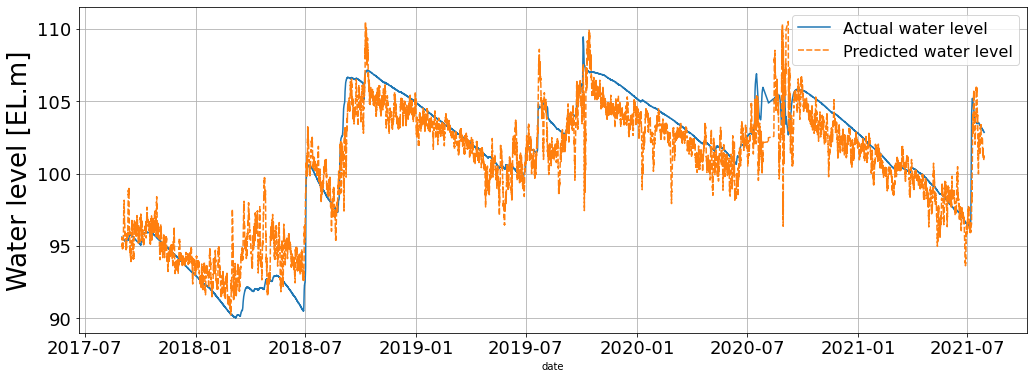

In [ ]:
plt.figure(figsize=(17, 6))

pre = sns.lineplot(data=outputs_test3)

plt.ylabel('Water level [EL.m]',fontsize = 26)
#plt.xlabel('Date', fontsize =26)
plt.grid(True)
plt.legend(labels=["Actual water level", "Predicted water level"], fontsize=16)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
#pre.xaxis.set_major_locator(mdates.YearLocator())
#pre.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

# Noise가 있는 예측값을 이동평균 방법을 통해 부드러운 (가는) 선으로 만들어줌

In [ ]:
rev_normal_169 = pd.DataFrame(predict_test)
rev_normal_169 = rev_normal_169.ewm(span=9*24).mean() #span은 이동평균을 위한 시간(길이)

In [ ]:
outputs_test4 = pd.DataFrame(y,columns = ['water level obs'])
outputs_test4['water level pre'] = rev_normal_169
print(outputs_test4)

       water level obs  water level pre
0                95.61        95.509949
1                95.61        95.494508
2                95.61        95.488178
3                95.60        95.489407
4                95.60        95.497133
...                ...              ...
33584           102.86       102.001124
33585           102.86       101.993868
33586           102.86       101.986792
33587           102.85       101.979887
33588           102.85       101.972982

[33589 rows x 2 columns]


In [ ]:
outputs_test4 = pd.concat([Date,outputs_test4],axis = 1)

outputs_test4.index = outputs_test4["date"]

In [ ]:
outputs_test4

,date,water level obs,water level pre
date,,,
2017-08-31 16:00:00,2017-08-31 16:00:00,95.61,95.509949
2017-08-31 17:00:00,2017-08-31 17:00:00,95.61,95.494508
2017-08-31 18:00:00,2017-08-31 18:00:00,95.61,95.488178
2017-08-31 19:00:00,2017-08-31 19:00:00,95.60,95.489407
2017-08-31 20:00:00,2017-08-31 20:00:00,95.60,95.497133
...,...,...,...
2021-07-28 12:00:00,2021-07-28 12:00:00,102.86,102.001124
2021-07-28 13:00:00,2021-07-28 13:00:00,102.86,101.993868
2021-07-28 14:00:00,2021-07-28 14:00:00,102.86,101.986792


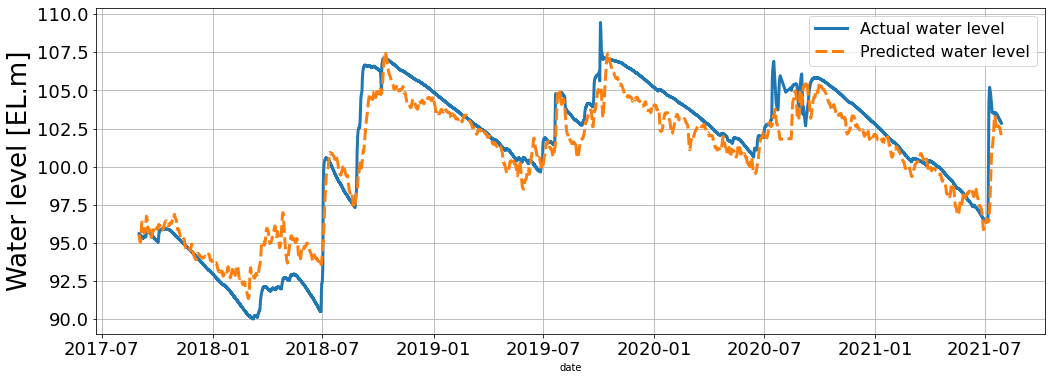

In [ ]:
plt.figure(figsize=(17, 6))

pre = sns.lineplot(data=outputs_test4, linewidth=3)

plt.ylabel('Water level [EL.m]',fontsize = 26)
#plt.xlabel('Date', fontsize =26)
plt.grid(True)
plt.legend(labels=["Actual water level", "Predicted water level"], fontsize=16)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.show()

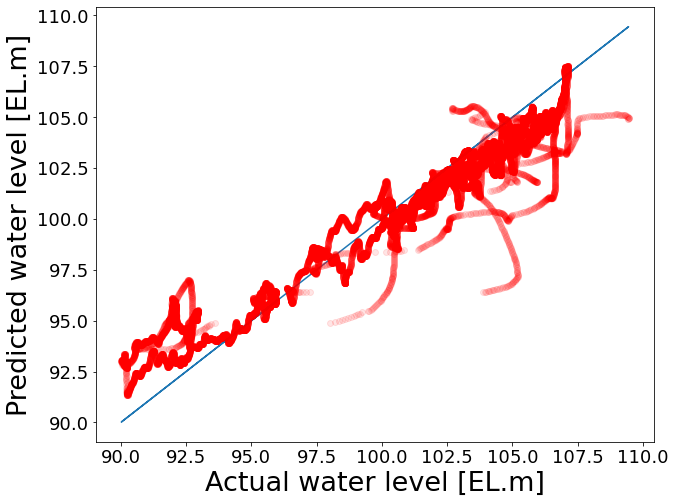

In [ ]:
plt.figure(figsize=(10,8))
predict_test  = model_sm2d.predict(x_test)
y = y_test
plt.plot(y_test, y)
plt.plot(y_test,rev_normal_169, 'ro',alpha = 0.1)
plt.xlabel('Actual water level [EL.m]', fontsize =27)
plt.ylabel('Predicted water level [EL.m]', fontsize =27)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.xlim
plt.ylim
plt.show()

In [ ]:
import hydroeval as he
nse = he.evaluator(he.nse, rev_normal_169, y)
kge, r, alpha, beta = he.evaluator(he.kge, rev_normal_169, y)

print(nse, kge)

[0.90233395] [0.77861807]


In [ ]:
print("MAE : " + str(mean_absolute_error(y, rev_normal_169)))

print("MAPE : " + str(mean_absolute_percentage_error(y, rev_normal_169)))

print("MSE : " + str(mean_squared_error(y, rev_normal_169)))

# RMSE
print("RMSE = ", np.sqrt(mean_squared_error(y, rev_normal_169)))

print("R2 : " + str(r2_score(y, rev_normal_169)))


MAE : 1.154936257158357
MAPE : 0.011543931075070669
MSE : 2.2321197831998507
RMSE =  1.494028039629729
R2 : 0.9023339540062576


In [ ]:
#data.to_csv('sm2t.csv')